<a href="https://colab.research.google.com/github/RiskyHermawan/TugasPraktikumML_141_169/blob/main/Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# masuk ke directory penyimpanan dataset anda
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [4]:
!ls

 breakhis-400x.zip		       'SOB_B_A-14-22549AB-400-001 (2).png'
 cat2dog.zip			       'SOB_B_A-14-22549AB-400-001 (3).png'
 flowers-recognition.zip	       'SOB_B_A-14-22549AB-400-001 (4).png'
 kaggle.json			       'SOB_B_A-14-22549AB-400-001 (5).png'
 model.h5			       'SOB_B_A-14-22549AB-400-001 (6).png'
 model.json			       'SOB_B_A-14-22549AB-400-001 (7).png'
 rockpaperscissors.zip		       'SOB_B_A-14-22549AB-400-001 (8).png'
 rose_new.jpg			       'SOB_B_A-14-22549AB-400-001 (9).png'
'SOB_B_A-14-22549AB-400-001 (10).png'   SOB_B_A-14-22549AB-400-001.png
'SOB_B_A-14-22549AB-400-001 (11).png'   x_test.npy
'SOB_B_A-14-22549AB-400-001 (12).png'   x_train.npy
'SOB_B_A-14-22549AB-400-001 (13).png'   x_val.npy
'SOB_B_A-14-22549AB-400-001 (14).png'   y_test.npy
'SOB_B_A-14-22549AB-400-001 (15).png'   y_train.npy
'SOB_B_A-14-22549AB-400-001 (16).png'   y_val.npy
'SOB_B_A-14-22549AB-400-001 (1).png'


In [5]:
import numpy as np

x_train = np.load("x_train.npy")
x_val = np.load("x_val.npy")
x_test = np.load("x_test.npy")
y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
import tensorflow as tf

In [7]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.AveragePooling2D(2, 2), #metode averagepooling mengambil nilai rata rata pergerseran pixel yang ada
    tf.keras.layers.GlobalAveragePooling2D(), #globalaveragepooling
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print ("Model 2 metode averagepooling")
model2.summary()

Model 2 metode averagepooling
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 124, 124, 32)      0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)           

In [8]:
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
NN = model2.fit(x_train, y_train, 
              batch_size=64, 
              epochs=100, 
              validation_data=(x_val, y_val), 
              verbose=2)

Epoch 1/100
54/54 - 37s - loss: -6.2787e+00 - acc: 0.2433 - val_loss: -3.5903e+01 - val_acc: 0.2436
Epoch 2/100
54/54 - 4s - loss: -4.7111e+02 - acc: 0.2436 - val_loss: -1.7074e+03 - val_acc: 0.2436
Epoch 3/100
54/54 - 4s - loss: -8.1294e+03 - acc: 0.2436 - val_loss: -2.1386e+04 - val_acc: 0.2436
Epoch 4/100
54/54 - 4s - loss: -6.3728e+04 - acc: 0.2436 - val_loss: -1.3141e+05 - val_acc: 0.2436
Epoch 5/100
54/54 - 4s - loss: -2.9299e+05 - acc: 0.2436 - val_loss: -5.2324e+05 - val_acc: 0.2436
Epoch 6/100
54/54 - 4s - loss: -9.6927e+05 - acc: 0.2436 - val_loss: -1.5696e+06 - val_acc: 0.2436
Epoch 7/100
54/54 - 4s - loss: -2.5726e+06 - acc: 0.2436 - val_loss: -3.8517e+06 - val_acc: 0.2436
Epoch 8/100
54/54 - 4s - loss: -5.8419e+06 - acc: 0.2436 - val_loss: -8.2556e+06 - val_acc: 0.2436
Epoch 9/100
54/54 - 4s - loss: -1.1880e+07 - acc: 0.2436 - val_loss: -1.5956e+07 - val_acc: 0.2436
Epoch 10/100
54/54 - 4s - loss: -2.2027e+07 - acc: 0.2436 - val_loss: -2.8602e+07 - val_acc: 0.2436
Epoch 11

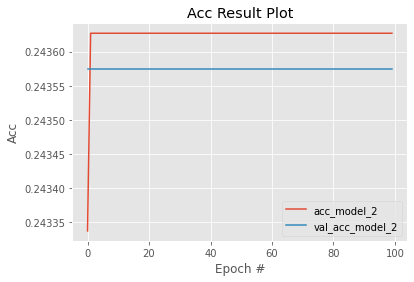

In [10]:
#Plot hasil training model berupa hasil validasi akurasi dan Buat report klasifikasi beserta dengan keterangan labelnya
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), NN.history["acc"], label="acc_model_2")
plt.plot(np.arange(0, 100), NN.history["val_acc"], label="val_acc_model_2")
plt.title("Acc Result Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

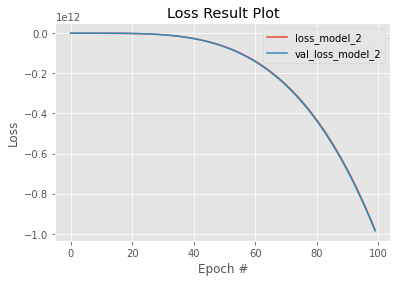

In [11]:
#Plot hasil training model berupa hasil validasi loss dan Buat report klasifikasi beserta dengan keterangan labelnya
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), NN.history["loss"], label="loss_model_2")
plt.plot(np.arange(0, 100), NN.history["val_loss"], label="val_loss_model_2")
plt.title("Loss Result Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
#model 2
from sklearn.metrics import classification_report

pred = model2.predict(x_train)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_train, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       611
           1       0.24      1.00      0.39       841
           2       0.00      0.00      0.00       627
           3       0.00      0.00      0.00       586
           4       0.00      0.00      0.00       787

    accuracy                           0.24      3452
   macro avg       0.05      0.20      0.08      3452
weighted avg       0.06      0.24      0.10      3452



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
